In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics 

In [20]:
df = pd.read_csv('gld_price_data.csv')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna()
df = df.drop(columns=['Date'], errors='ignore')

# df.shape
# df.info()

<Axes: >

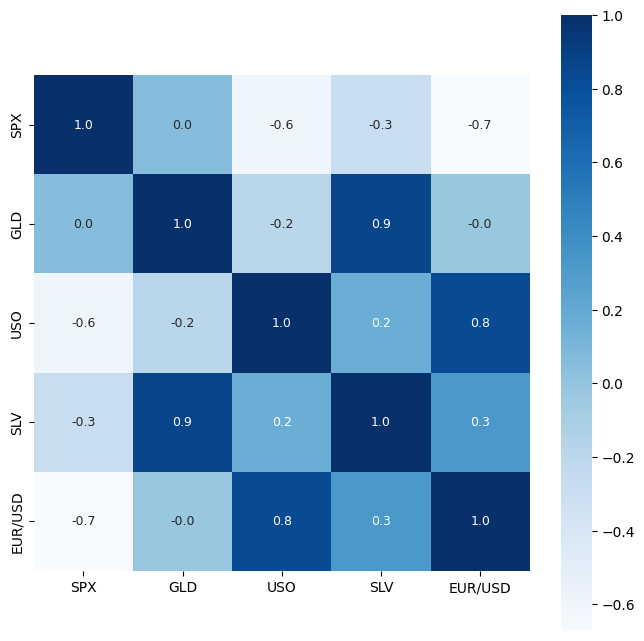

In [ ]:
# df.isnull().sum()

df.describe()

correlation = df.corr()

plt.figure(figsize= (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':9}, cmap='Blues')

In [24]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\AGP KOHAT\AppData\Local\Temp\ipykernel_13516\2868900106.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'], color='green')


<Axes: xlabel='GLD', ylabel='Density'>

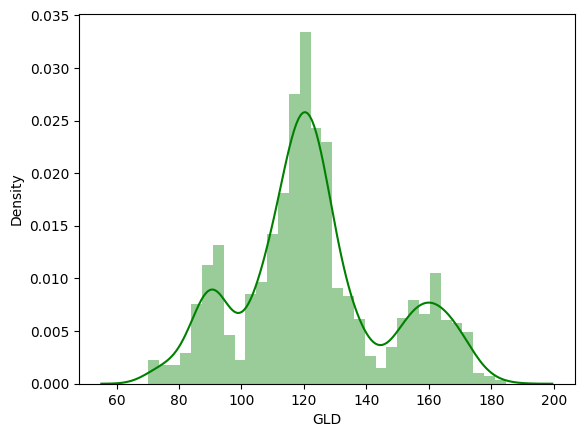

In [26]:
sns.distplot(df['GLD'], color='green')

In [29]:
X = df.drop(['Date', 'GLD'], axis=1, errors='ignore')
y = df['GLD']


In [30]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [31]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [33]:
model = RandomForestRegressor(n_estimators=100)

model.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [34]:
test_data_pred = model.predict(X_test)

In [35]:
print(test_data_pred)

[168.49839967  81.91839998 116.32049984 127.67920062 120.7834015
 154.79749783 150.33749844 126.15380064 117.38689888 126.05330071
 116.66310093 171.29620098 141.36379876 168.05349844 115.26550023
 117.69250033 137.88930284 170.30710116 160.22290332 159.72089957
 155.19460031 125.03189973 175.7372999  157.66920426 125.1063005
  93.59229965  77.83939989 120.72100003 119.07949933 167.35550014
  87.99130046 125.20370005  91.47950099 117.78589969 121.17099888
 136.41980106 115.54240102 115.1218005  147.17159971 107.37850084
 104.47920238  87.24359816 126.43030047 117.75109974 153.25349874
 119.54480001 108.30589987 108.09299857  93.12980055 127.2331975
  74.5256005  113.79349916 121.24990015 111.2608991  118.89239893
 120.57729932 159.06069957 167.77870116 147.26159684  85.91539868
  94.54210036  86.81959882  90.50500042 119.09350017 126.45430063
 127.65270002 169.17129912 122.29999933 117.29089923  98.66420041
 167.7855016  143.21469792 131.71250213 121.13870242 121.07859927
 120.17090055

In [36]:
error_score = metrics.r2_score(y_test, test_data_pred)
print("R2 error:", error_score)

R2 error: 0.989288766294727


In [37]:
y_test = list(y_test)

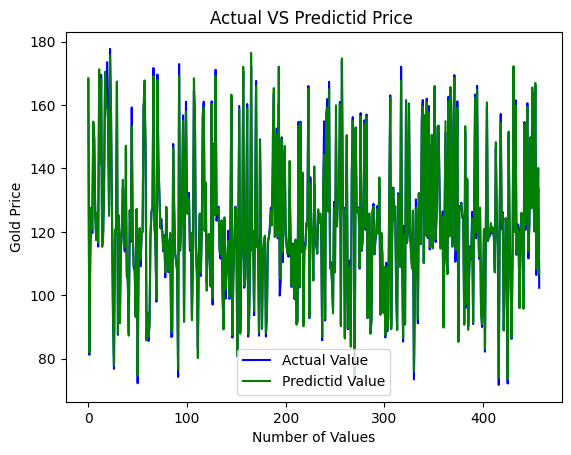

In [39]:
plt.plot(y_test,color= 'blue', label='Actual Value')
plt.plot(test_data_pred, color='green', label='Predictid Value')
plt.title('Actual VS Predictid Price ')
plt.xlabel('Number of Values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

In [40]:
print("Project Complete !!!")

Project Complete !!!
